In [1]:
import numpy as np
import pandas as pd

In [28]:
from sklearn.decomposition import PCA
pca_df = pd.read_csv("PCA_train_data_customers.csv",index_col=0)
pca_test = pd.read_csv("PCA_test_data_customers.csv",index_col=0)

In [29]:
pca_test

0         1         2         3         4         5         6  \
0    360.629924  1.391746  2.895748 -0.196283 -0.154681  0.772907 -0.737065   
1    416.630028  0.342124  0.378205 -0.134316 -0.032033 -1.368130  0.352615   
2    -29.370023  0.602569 -1.576726  0.700264 -0.311915  0.401703 -0.200068   
3   -420.369895 -0.072416  0.762096  0.844451  0.001166 -0.953956 -0.539274   
4   -302.370425 -0.976640 -0.829527 -0.759428 -0.199284  0.345141  1.038380   
..          ...       ...       ...       ...       ...       ...       ...   
195 -106.370150  0.250960  0.547174  0.301982  1.650849 -0.579727  0.182081   
196 -329.370034  0.395034 -1.336958  0.063771 -0.001578  0.856537  0.216083   
197   35.629854 -0.797646  0.188083  0.454742  0.324070  1.033042  0.084233   
198 -377.369870  0.793712  1.022856  0.454936  0.187387 -1.560388  0.826040   
199   86.629689 -1.002431 -0.579360 -0.565836  0.003611  0.469957  1.120900   

            7         8         9        10        11        12        13  \
0    0.616563  0.291177  0.265967  0.413509  0.718263 -0.897235 -0.326888   
1    0.403598 -0.555539 -0.894628  0.518362  0.042879  0.016301  0.857736   
2   -0.659339  0.852952 -0.159204 -0.074790  0.479672  0.836103 -0.553914   
3   -0.135174 -0.567942 -0.314329  0.804403  0.835842 -0.213248  0.414372   
4   -1.178144  0.116429  0.993451 -0.705205 -0.495193 -0.023258 -0.424792   
..        ...       ...       ...       ...       ...       ...       ...   
195 -0.804722 -0.825758 -0.130609 -0.018937 -0.031607  0.269303  0.292295   
196 -0.222325 -0.085082 -1.525611 -0.283125 -1.003759 -0.397459  1.031317   
197  0.736396 -0.429573  1.164358 -0.193456 -0.694692  0.426274  0.338441   
198 -0.541591  0.229690  0.755540 -0.178613 -1.145510 -0.454937 -0.492500   
199  0.357435 -0.356214  0.321716  0.083931 -0.282706  1.361165 -0.296966   

           14        15        16        17        18  ChurnStatus  
0    1.023958 -1.241229 -0.124855 -0.280592 -0.263177          0.0  
1    0.431042 -0.456185 -0.293783 -0.558377  0.863234          0.0  
2   -0.054525 -0.306596  0.607681 -0.444053 -0.157060          0.0  
3   -0.486587  0.704996 -0.488917 -0.043347 -0.165145          0.0  
4    0.907464 -0.607682 -0.352733 -0.159667 -0.311100          0.0  
..        ...       ...       ...       ...       ...          ...  
195 -0.483912  0.486153 -0.630220 -0.728746 -0.113809          0.0  
196  1.098227  0.062216  0.581052  0.369466 -0.653988          0.0  
197  0.080114 -0.128686  0.036885 -0.183930  1.222347          0.0  
198 -0.654997  0.175809  1.224437 -0.353021 -0.088217          0.0  
199 -0.166908  0.362715 -0.677921 -0.474130  0.131572          0.0  

[200 rows x 20 columns]

In [30]:
newcolums = [f'PC{i+1}' for i in range(0,19)]
print(newcolums,pca_df.columns[19:])
pca_df.columns= newcolums + list(pca_df.columns[19:])
pca_test.columns = newcolums + list(pca_df.columns[19:])

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19'] Index(['ChurnStatus'], dtype='object')


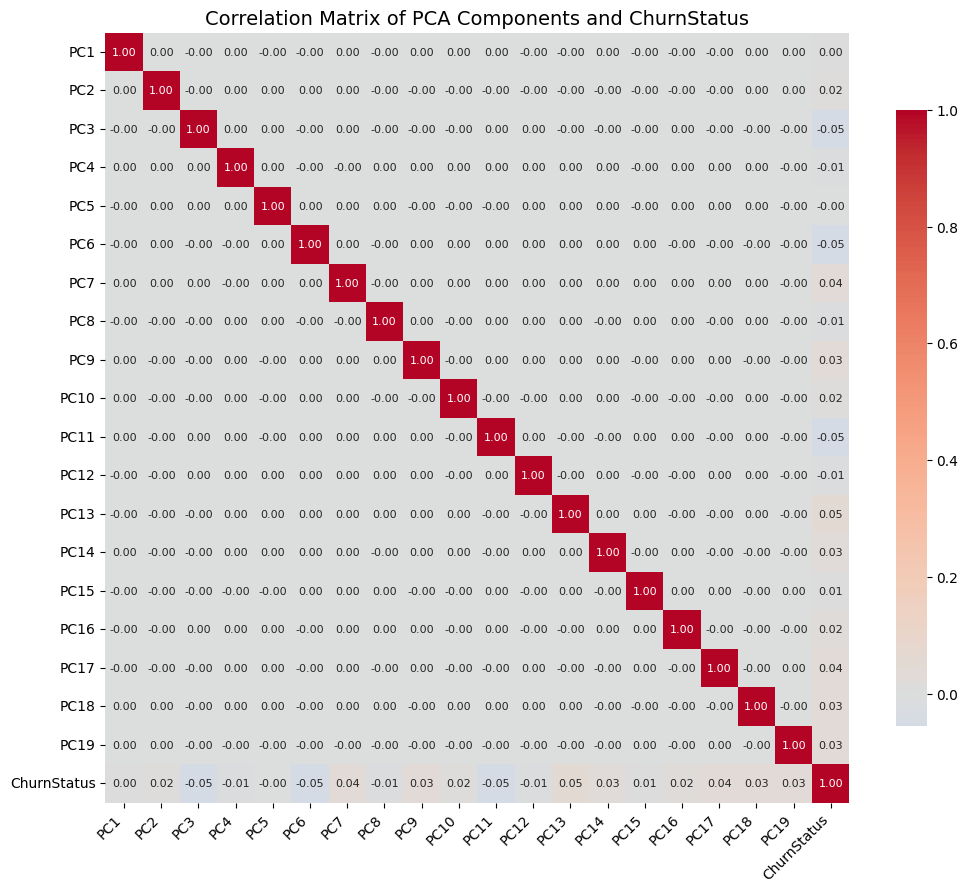

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = pca_df.corr()

plt.figure(figsize=(12, 10))  
sns.heatmap(
    correlation_matrix, 
    annot=True,          
    fmt=".2f",           
    cmap='coolwarm',    
    center=0, 
    cbar_kws={'shrink': 0.8},  
    annot_kws={"size": 8}      
)
plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.yticks(fontsize=10)    
plt.title('Correlation Matrix of PCA Components and ChurnStatus', fontsize=14)
plt.show()

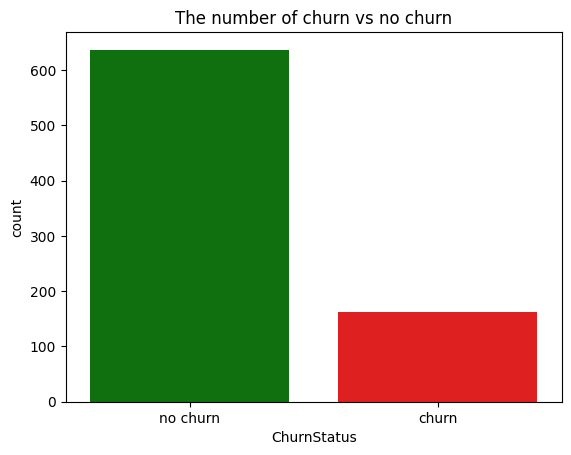

In [32]:
sns.countplot(x=pca_df['ChurnStatus'].map({0: 'no churn', 1: 'churn'}), hue=pca_df['ChurnStatus'].map({0: 'no churn', 1: 'churn'}), palette=["green", "red"], dodge=False)
plt.title("The number of churn vs no churn")
plt.show()

In [33]:
from imblearn.over_sampling import SMOTE
X = pca_df.drop("ChurnStatus", axis=1)  # 特征数据
y = pca_df["ChurnStatus"]              # 目标数据


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


pca_df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
pca_df_resampled["ChurnStatus"] = y_resampled


print("原始数据：")
print(pca_df)
print("\nOversampling 后的数据：")
print(pca_df_resampled)

原始数据：
            PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   -136.369960  0.645666 -1.346970  1.832304  0.292768  0.874797 -1.126325   
1   -260.369983  0.816133  1.109544 -1.101399 -0.751126  0.192524  0.404121   
2     88.630136  2.205235 -1.282096  0.240551 -0.105582  0.256854 -0.088461   
3    -16.370105 -1.425340 -0.323907  0.576297  0.132998  0.492782 -0.836280   
4    -26.369777  0.180421  1.417045 -0.176117 -1.812940 -0.400539 -0.715216   
..          ...       ...       ...       ...       ...       ...       ...   
795  384.629938 -1.295406 -0.173063  0.423683  0.843162  0.085316 -0.895366   
796  196.630287  1.357206 -1.810664 -0.160786  0.638524 -0.644036 -1.116397   
797  250.630134 -1.044731  0.271061  0.678381 -0.707320 -0.183066 -0.323026   
798  217.630031 -0.561316  1.068619  0.180715 -0.811076  0.266940  0.464909   
799 -154.369885  1.753287 -0.284877  1.420114 -0.121151  0.156270 -0.229709   

          PC8       PC9      PC10      PC11  

In [9]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# 原始数据
X = pca_df.drop("ChurnStatus", axis=1)  # 特征数据
y = pca_df["ChurnStatus"]              # 目标数据

# 创建欠采样器
under_sampler = RandomUnderSampler(random_state=42)

# 对数据进行欠采样
X_resampled, y_resampled = under_sampler.fit_resample(X, y)

# 将采样后的数据重新组合为 DataFrame
pca_df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
pca_df_resampled["ChurnStatus"] = y_resampled

# 打印结果
print("原始数据分布：")
print(y.value_counts())
print("\n欠采样后的数据分布：")
print(y_resampled.value_counts())

print("\n欠采样后的数据示例：")
print(pca_df_resampled.head())


原始数据分布：
ChurnStatus
0.0    637
1.0    163
Name: count, dtype: int64

欠采样后的数据分布：
ChurnStatus
0.0    163
1.0    163
Name: count, dtype: int64

欠采样后的数据示例：
            PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
311 -409.370230 -0.777168  0.651485 -0.246242 -0.015589 -0.212357  0.253382   
273  313.629935  0.357522  1.388962 -1.659594 -0.871706  0.326540 -0.301779   
38  -412.370148  1.198279  0.050089 -0.047273  1.104721 -0.713088  0.759956   
633  198.629826  0.562801 -0.920751  0.379556  0.589080  0.771021  0.761407   
629  428.629827 -1.319352 -0.118337  0.013171  0.012976  0.444182  1.328231   

          PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
311 -0.538683  0.339678 -0.085752  0.180560 -0.550909  1.091034  0.235312   
273 -0.307323  0.014462  0.176904  0.978433  0.174692  1.638054 -0.262900   
38   0.083854  0.058260  0.197357 -0.037282  0.660057 -1.032936 -0.105362   
633 -1.575729  0.362926 -0.309806 -1.025256  0.268852  0.777043 -

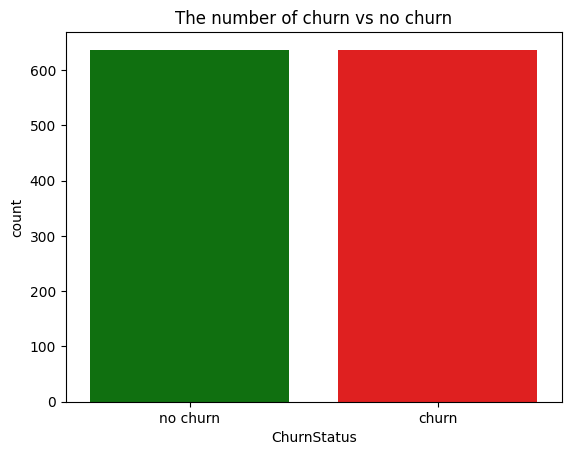

In [34]:
sns.countplot(x=pca_df_resampled['ChurnStatus'].map({0: 'no churn', 1: 'churn'}), hue=pca_df_resampled['ChurnStatus'].map({0: 'no churn', 1: 'churn'}), palette=["green", "red"], dodge=False)
plt.title("The number of churn vs no churn")
plt.show()

In [35]:
pca_df = pca_df.sample(frac=1, random_state=42)

In [36]:
X_train = pca_df.drop('ChurnStatus', axis=1).values
y_train = pca_df['ChurnStatus'].values

In [62]:
X_train = pca_df_resampled.drop('ChurnStatus', axis=1).values
y_train = pca_df_resampled['ChurnStatus'].values

In [37]:
pca_test

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    360.629924  1.391746  2.895748 -0.196283 -0.154681  0.772907 -0.737065   
1    416.630028  0.342124  0.378205 -0.134316 -0.032033 -1.368130  0.352615   
2    -29.370023  0.602569 -1.576726  0.700264 -0.311915  0.401703 -0.200068   
3   -420.369895 -0.072416  0.762096  0.844451  0.001166 -0.953956 -0.539274   
4   -302.370425 -0.976640 -0.829527 -0.759428 -0.199284  0.345141  1.038380   
..          ...       ...       ...       ...       ...       ...       ...   
195 -106.370150  0.250960  0.547174  0.301982  1.650849 -0.579727  0.182081   
196 -329.370034  0.395034 -1.336958  0.063771 -0.001578  0.856537  0.216083   
197   35.629854 -0.797646  0.188083  0.454742  0.324070  1.033042  0.084233   
198 -377.369870  0.793712  1.022856  0.454936  0.187387 -1.560388  0.826040   
199   86.629689 -1.002431 -0.579360 -0.565836  0.003611  0.469957  1.120900   

          PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0    0.616563  0.291177  0.265967  0.413509  0.718263 -0.897235 -0.326888   
1    0.403598 -0.555539 -0.894628  0.518362  0.042879  0.016301  0.857736   
2   -0.659339  0.852952 -0.159204 -0.074790  0.479672  0.836103 -0.553914   
3   -0.135174 -0.567942 -0.314329  0.804403  0.835842 -0.213248  0.414372   
4   -1.178144  0.116429  0.993451 -0.705205 -0.495193 -0.023258 -0.424792   
..        ...       ...       ...       ...       ...       ...       ...   
195 -0.804722 -0.825758 -0.130609 -0.018937 -0.031607  0.269303  0.292295   
196 -0.222325 -0.085082 -1.525611 -0.283125 -1.003759 -0.397459  1.031317   
197  0.736396 -0.429573  1.164358 -0.193456 -0.694692  0.426274  0.338441   
198 -0.541591  0.229690  0.755540 -0.178613 -1.145510 -0.454937 -0.492500   
199  0.357435 -0.356214  0.321716  0.083931 -0.282706  1.361165 -0.296966   

         PC15      PC16      PC17      PC18      PC19  ChurnStatus  
0    1.023958 -1.241229 -0.124855 -0.280592 -0.263177          0.0  
1    0.431042 -0.456185 -0.293783 -0.558377  0.863234          0.0  
2   -0.054525 -0.306596  0.607681 -0.444053 -0.157060          0.0  
3   -0.486587  0.704996 -0.488917 -0.043347 -0.165145          0.0  
4    0.907464 -0.607682 -0.352733 -0.159667 -0.311100          0.0  
..        ...       ...       ...       ...       ...          ...  
195 -0.483912  0.486153 -0.630220 -0.728746 -0.113809          0.0  
196  1.098227  0.062216  0.581052  0.369466 -0.653988          0.0  
197  0.080114 -0.128686  0.036885 -0.183930  1.222347          0.0  
198 -0.654997  0.175809  1.224437 -0.353021 -0.088217          0.0  
199 -0.166908  0.362715 -0.677921 -0.474130  0.131572          0.0  

[200 rows x 20 columns]

In [68]:
X_test = pca_test.drop('ChurnStatus', axis=1).values
y_test = pca_test['ChurnStatus'].values

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold


stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Logistic Regression 
#log_reg_params = {"penalty": ['l1', 'l2'], 'C': np.logspace(0, 4, 10, 100, 1000),'max_iter': [10000]}
log_reg_params = {
    "penalty": ['l1', 'l2'],
    'C': np.logspace(0, 4, 10),
    'solver': ['liblinear', 'saga'],  
    'max_iter': [10000]
}


grid_log_reg = GridSearchCV(LogisticRegression(),
                            log_reg_params,
                            cv=stratified_kfold,
                           n_jobs= -1)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_


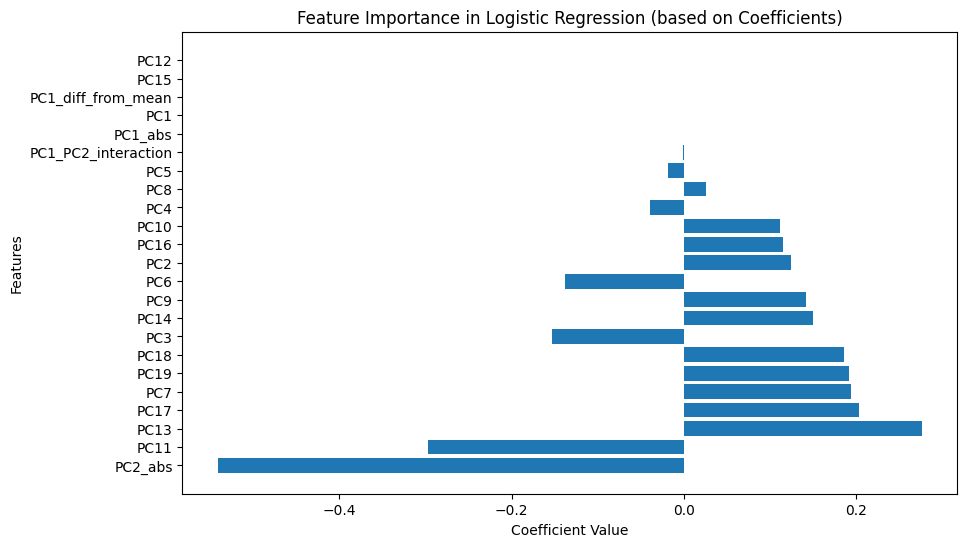

In [64]:
if hasattr(log_reg, 'coef_'):
    coefficients = log_reg.coef_[0]  
    features = np.array(list(pca_df_resampled.drop('ChurnStatus', axis=1).columns))  

    sorted_idx = np.argsort(np.abs(coefficients))[::-1]  
    sorted_features = features[sorted_idx]
    sorted_coefficients = coefficients[sorted_idx]

    plt.figure(figsize=(10, 6))
    plt.barh(sorted_features, sorted_coefficients)
    plt.xlabel("Coefficient Value")
    plt.ylabel("Features")
    plt.title("Feature Importance in Logistic Regression (based on Coefficients)")
    plt.show()


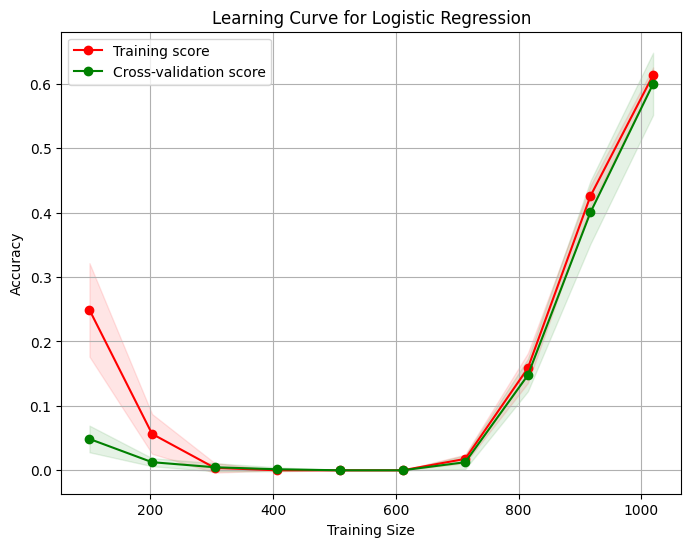

In [65]:
from sklearn.model_selection import learning_curve



train_sizes, train_scores, test_scores = learning_curve(
    log_reg, X_train, y_train, cv=stratified_kfold, scoring='recall', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)


train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


plt.figure(figsize=(8, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for Logistic Regression")
plt.legend(loc="best")
plt.grid()
plt.show()


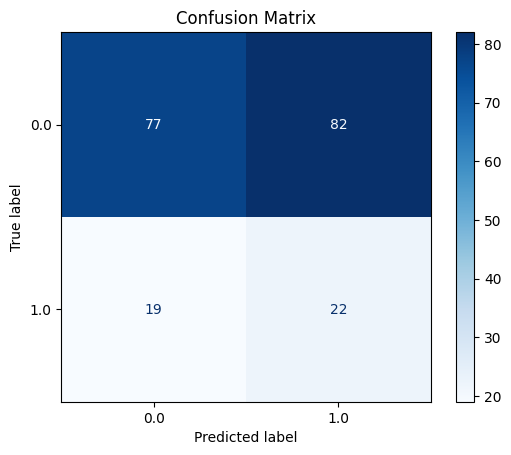

In [69]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


y_pred = log_reg.predict(X_test)


cm = confusion_matrix(y_test, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


Precision: 0.21
Recall: 0.54
F1 Score: 0.30
MCC: 0.02
ROC AUC: 0.52


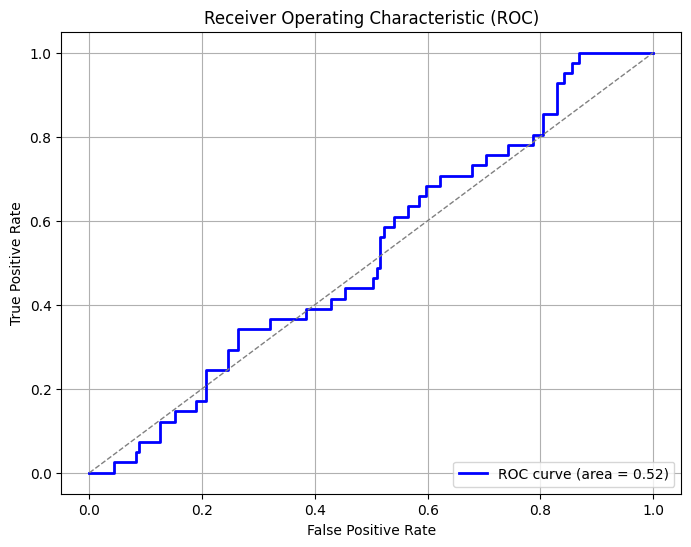

In [70]:
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score
from sklearn.metrics import classification_report, roc_curve, auc


y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]  


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)


print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"MCC: {mcc:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")


fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [71]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'max_depth': [5, 10, 15],
    'max_features': ['sqrt'],
    'min_samples_leaf': [5, 10],
    'min_samples_split': [5, 10],
    'n_estimators': [100, 200, 300],
    'class_weight': ['balanced_subsample']
}

rf = RandomForestClassifier(class_weight='balanced')
rf_grid = GridSearchCV(rf, param_grid, cv=stratified_kfold, scoring='roc_auc', verbose=10, n_jobs=-1)
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


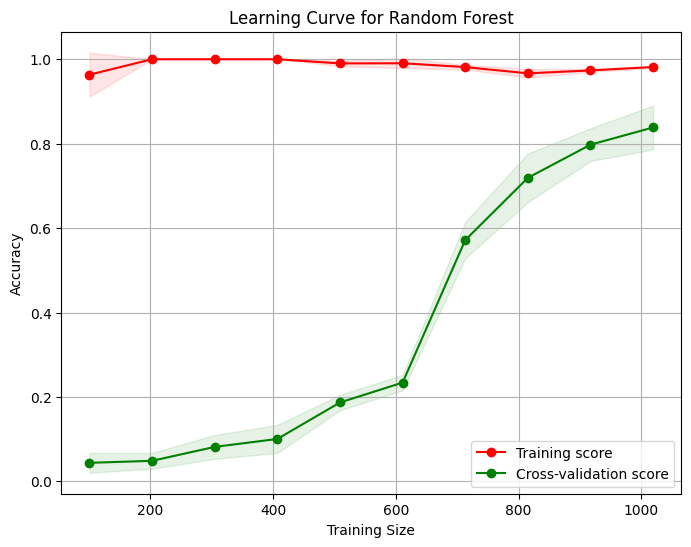

In [72]:
from sklearn.model_selection import learning_curve



train_sizes, train_scores, test_scores = learning_curve(
    rf_best, X_train, y_train, cv=stratified_kfold, scoring='recall', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)


train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


plt.figure(figsize=(8, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for Random Forest")
plt.legend(loc="best")
plt.grid()
plt.show()

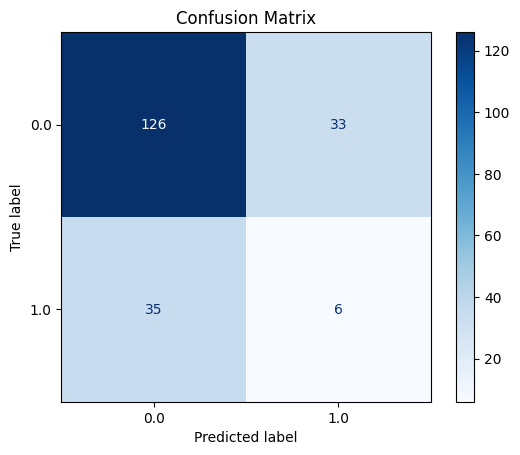

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


y_pred = rf_best.predict(X_test)


cm = confusion_matrix(y_test, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


Precision: 0.15
Recall: 0.15
F1 Score: 0.15
MCC: -0.06
ROC AUC: 0.47


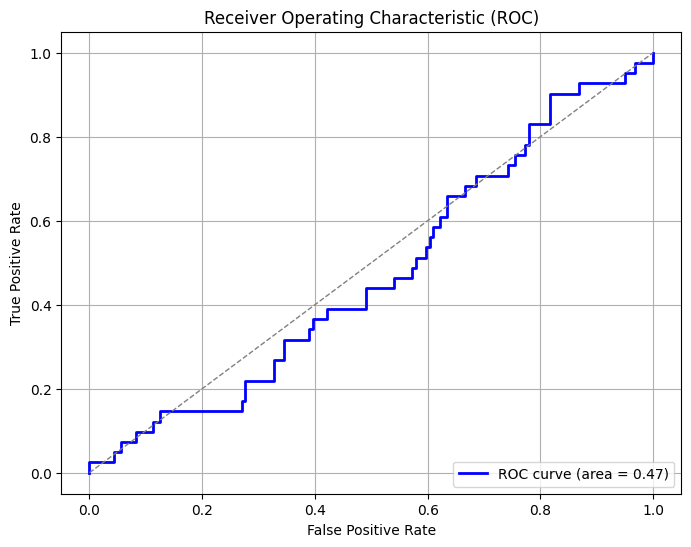

In [74]:
y_pred = rf_best.predict(X_test)
y_proba = rf_best.predict_proba(X_test)[:, 1]  


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)


print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"MCC: {mcc:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

# 绘制 ROC 曲线
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [75]:
from xgboost import XGBClassifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 10]
}

xgb = XGBClassifier(eval_metric="logloss", random_state=42)

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='recall',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)


best_xgb = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


y_pred = best_xgb.predict(X_test)
y_proba = best_xgb.predict_proba(X_test)[:, 1]


print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'reg_alpha': 1, 'reg_lambda': 1, 'subsample': 1.0}
Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.83      0.82       159
         1.0       0.25      0.22      0.23        41

    accuracy                           0.70       200
   macro avg       0.53      0.52      0.53       200
weighted avg       0.69      0.70      0.70       200

ROC AUC Score: 0.4855039116428901


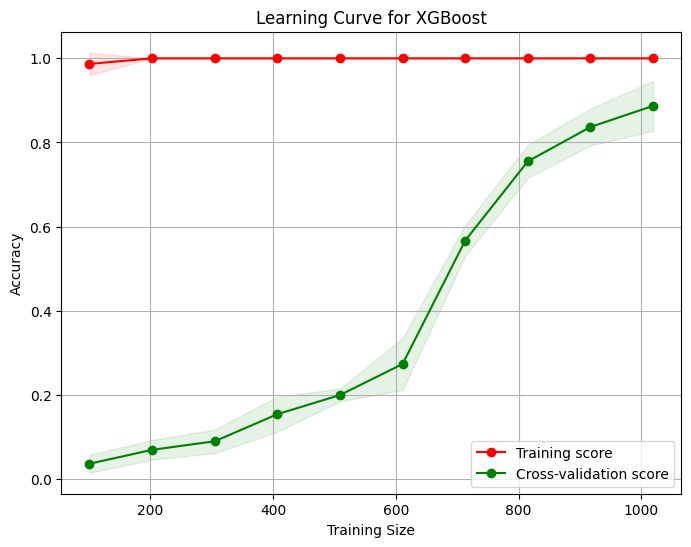

In [76]:
from sklearn.model_selection import learning_curve



train_sizes, train_scores, test_scores = learning_curve(
    best_xgb, X_train, y_train, cv=stratified_kfold, scoring='recall', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)


train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


plt.figure(figsize=(8, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for XGBoost")
plt.legend(loc="best")
plt.grid()
plt.show()

Precision: 0.25
Recall: 0.22
F1 Score: 0.23
MCC: 0.05
ROC AUC: 0.49


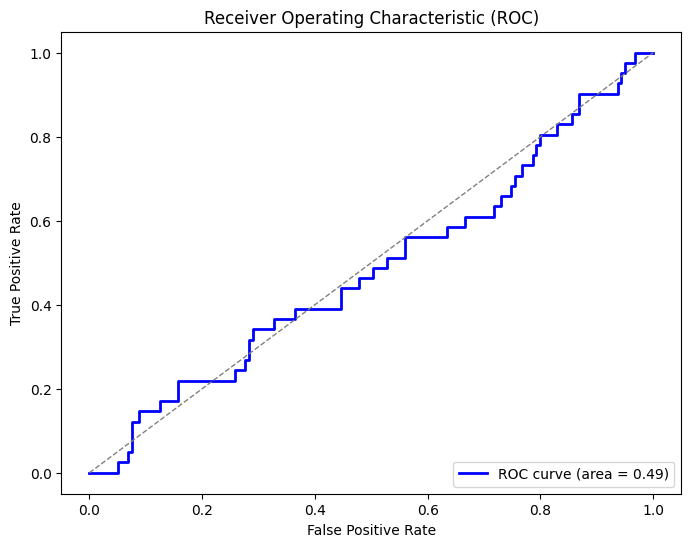

In [77]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)


print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"MCC: {mcc:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")


fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

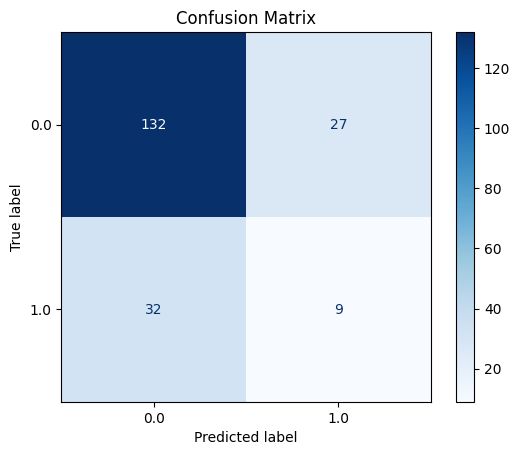

In [78]:
y_pred = best_xgb.predict(X_test)


cm = confusion_matrix(y_test, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


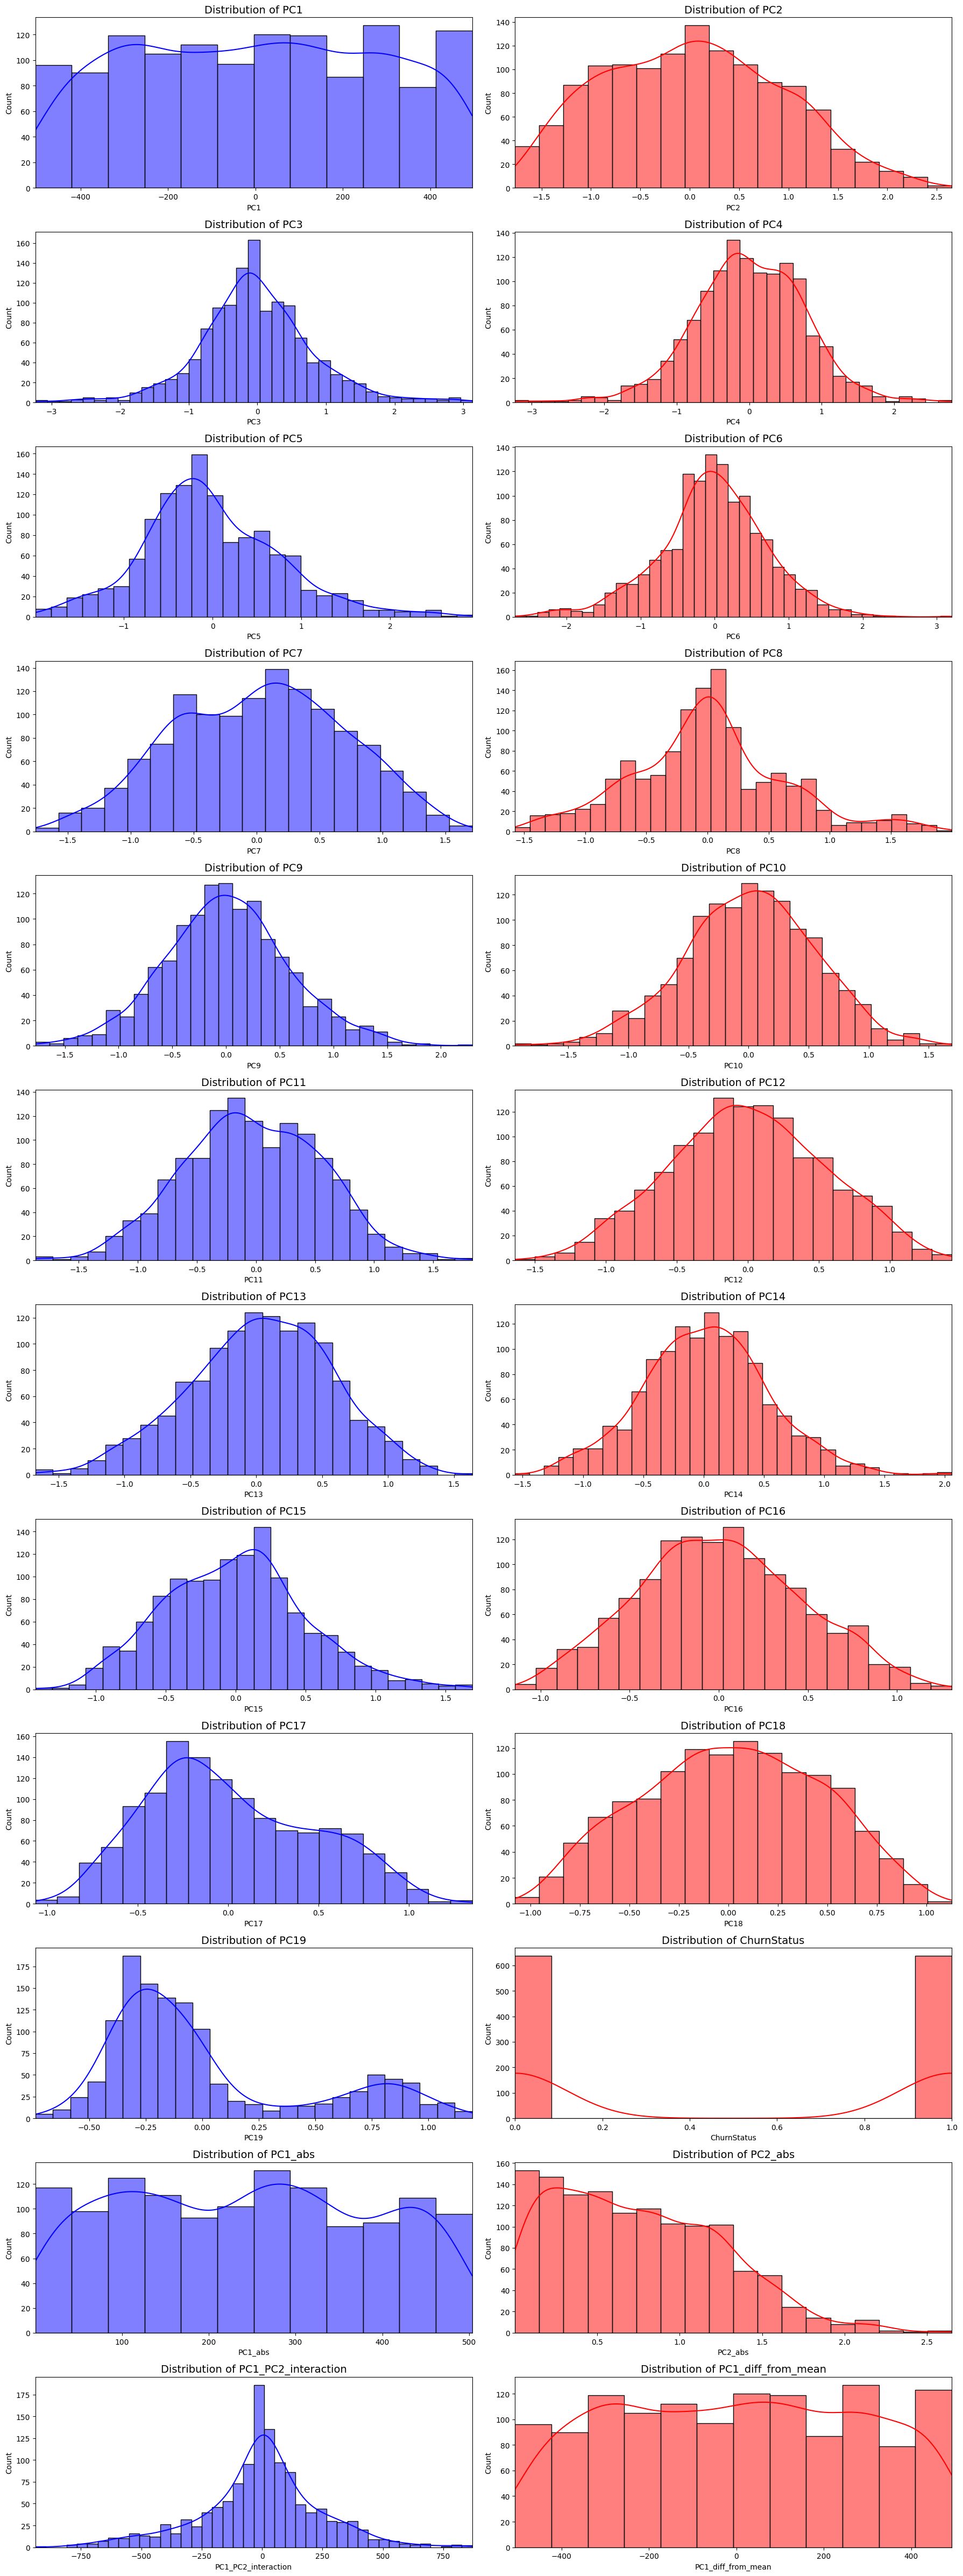

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
num_cols = pca_df_resampled.columns

fig, axes = plt.subplots(len(num_cols)//2, 2, figsize=(18, 4 * (len(num_cols)//2)))
axes = axes.flatten()  

for i, col in enumerate(num_cols):
    sns.histplot(pca_df_resampled[col], ax=axes[i], color='b' if i % 2 == 0 else 'r', kde= True)
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlim([pca_df_resampled[col].min(), pca_df_resampled[col].max()])

plt.tight_layout()
plt.show()

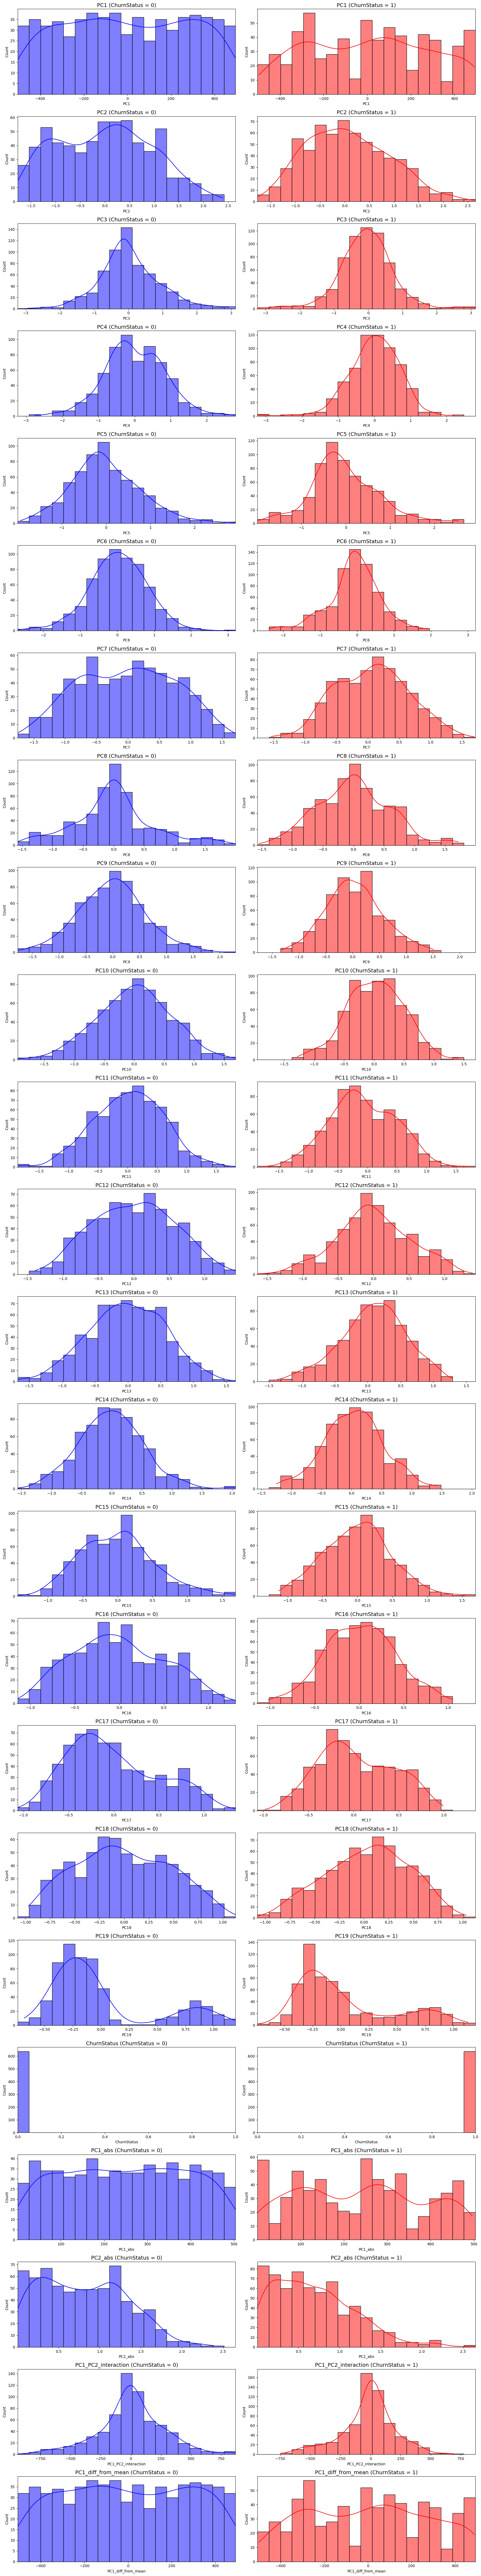


[CV 3/5; 1/36] START class_weight=balanced_subsample, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100
[CV 3/5; 1/36] END class_weight=balanced_subsample, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.829 total time=   0.5s
[CV 3/5; 3/36] START class_weight=balanced_subsample, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=300
[CV 3/5; 3/36] END class_weight=balanced_subsample, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=300;, score=0.808 total time=   1.4s
[CV 4/5; 5/36] START class_weight=balanced_subsample, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=200
[CV 4/5; 5/36] END class_weight=balanced_subsample, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.831 total time=   0.9s
[CV 5/5; 6/36] START class_weight=balanc

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(len(num_cols), 2, figsize=(18, 4 * len(num_cols)))  # Two columns for side-by-side plots

for i, col in enumerate(num_cols):
    # Calculate common bin edges
    col_min = pca_df_resampled[col].min()
    col_max = pca_df_resampled[col].max()
    bin_edges = np.linspace(col_min, col_max, 20)  # 20 bins as an example, adjust as needed

    # Plot for ChurnStatus == 0
    sns.histplot(
        pca_df_resampled[pca_df_resampled['ChurnStatus'] == 0][col],
        ax=axes[i, 0],
        color='b',
        kde=True,
        bins=bin_edges
    )
    axes[i, 0].set_title(f'{col} (ChurnStatus = 0)', fontsize=14)
    axes[i, 0].set_xlim([col_min, col_max])
    
    # Plot for ChurnStatus == 1
    sns.histplot(
        pca_df_resampled[pca_df_resampled['ChurnStatus'] == 1][col],
        ax=axes[i, 1],
        color='r',
        kde=True,
        bins=bin_edges
    )
    axes[i, 1].set_title(f'{col} (ChurnStatus = 1)', fontsize=14)
    axes[i, 1].set_xlim([col_min, col_max])

plt.tight_layout()
plt.show()
print()

In [58]:
# 构造 PC1 和 PC2 的绝对值特征
pca_df_resampled['PC1_abs'] = pca_df_resampled['PC1'].abs()
pca_df_resampled['PC2_abs'] = pca_df_resampled['PC2'].abs()

# 构造 PC1 和 PC2 的交互特征
pca_df_resampled['PC1_PC2_interaction'] = pca_df_resampled['PC1'] * pca_df_resampled['PC2']

# 构造类别的均值差异特征
grouped = pca_df_resampled.groupby("ChurnStatus")['PC1'].mean()
pca_df_resampled['PC1_diff_from_mean'] = pca_df_resampled['PC1'] - grouped.mean()


In [67]:
# 构造 PC1 和 PC2 的绝对值特征
pca_test['PC1_abs'] = pca_test['PC1'].abs()
pca_test['PC2_abs'] = pca_test['PC2'].abs()

# 构造 PC1 和 PC2 的交互特征
pca_test['PC1_PC2_interaction'] = pca_test['PC1'] * pca_test['PC2']

# 构造类别的均值差异特征
grouped = pca_test.groupby("ChurnStatus")['PC1'].mean()
pca_test['PC1_diff_from_mean'] = pca_test['PC1'] - grouped.mean()


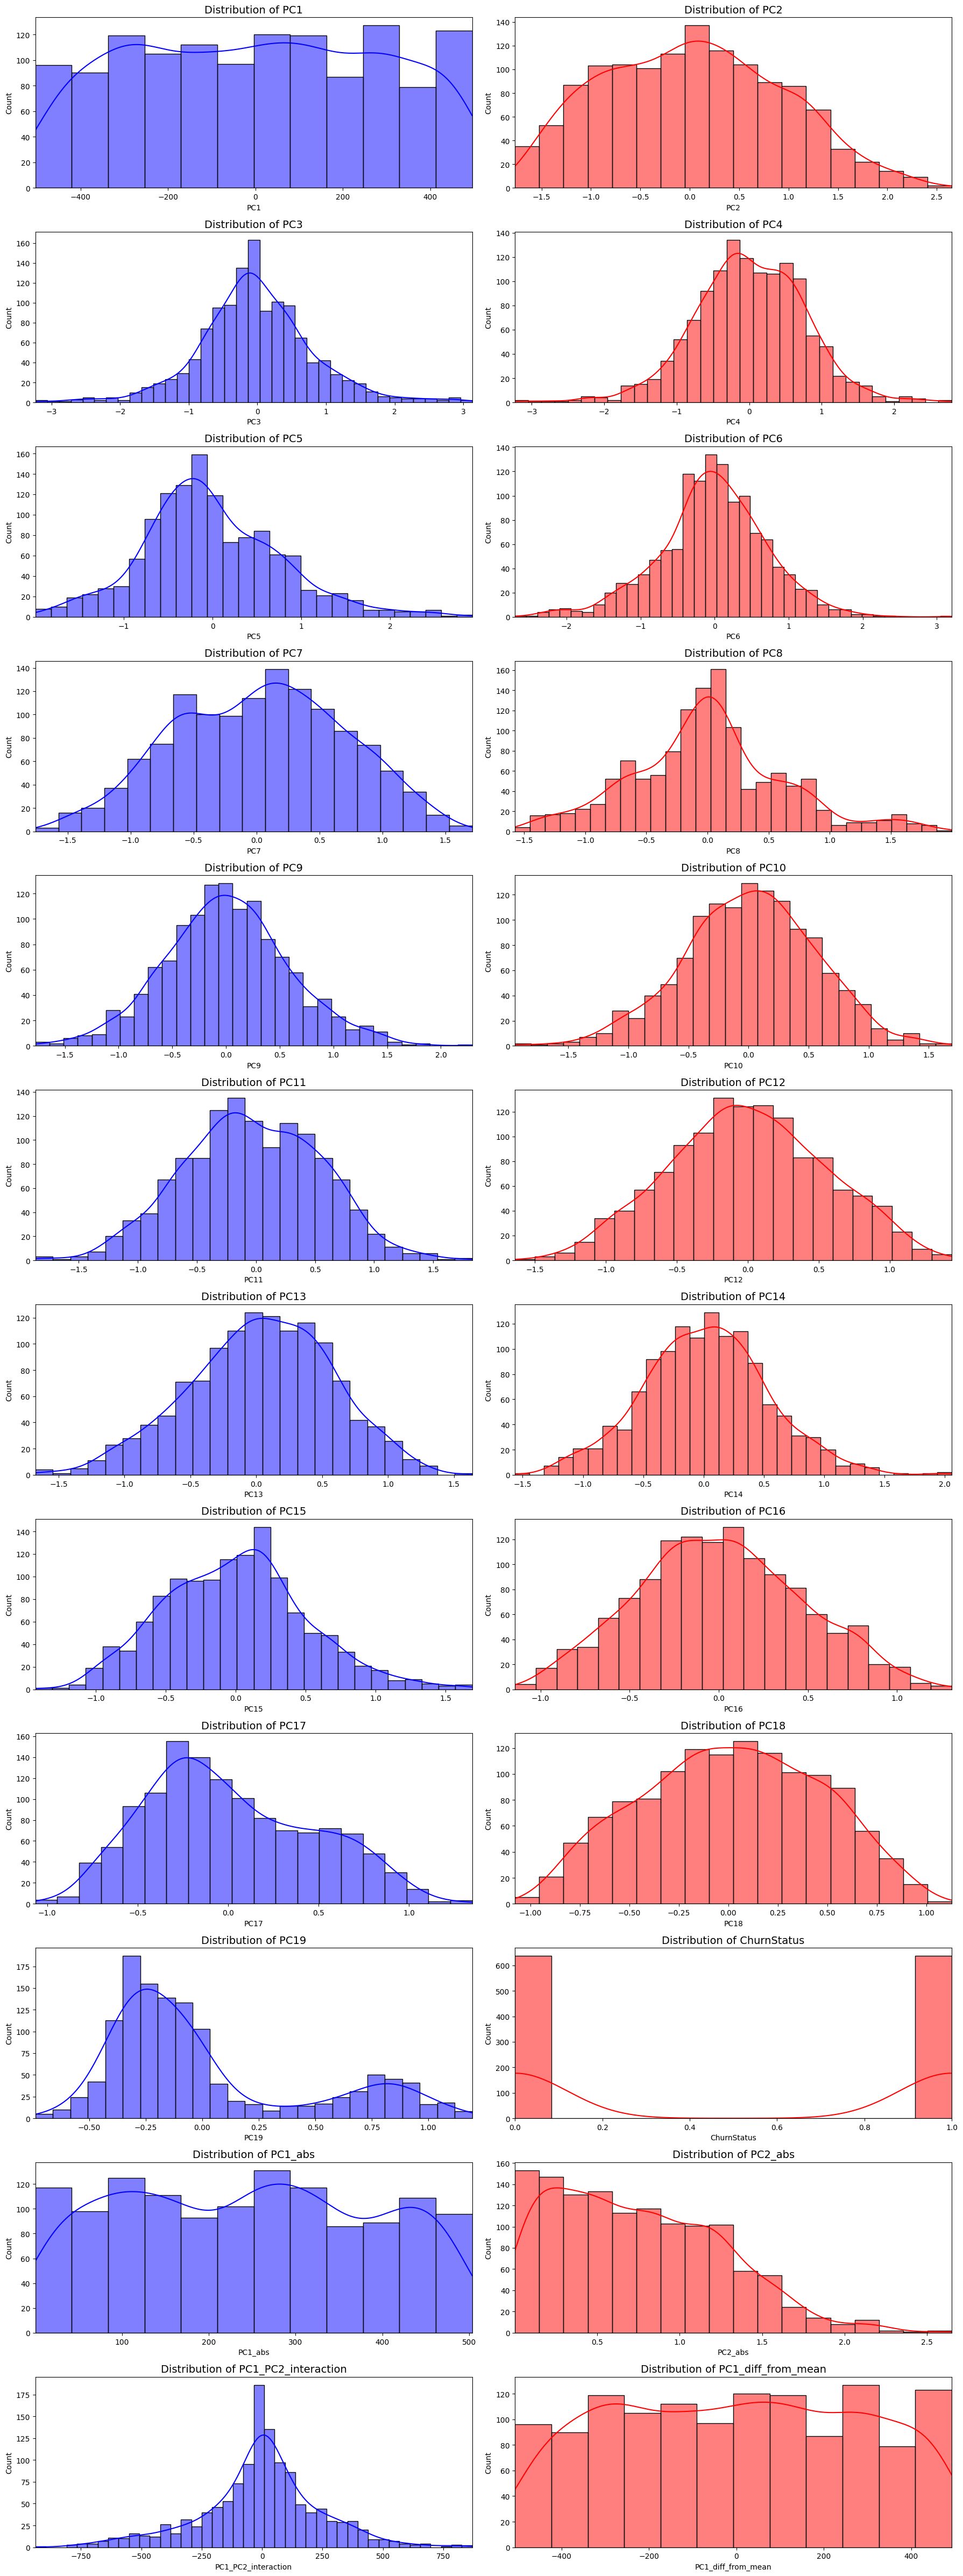

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
num_cols = pca_df_resampled.columns

fig, axes = plt.subplots(len(num_cols)//2, 2, figsize=(18, 4 * (len(num_cols)//2)))
axes = axes.flatten()  

for i, col in enumerate(num_cols):
    sns.histplot(pca_df_resampled[col], ax=axes[i], color='b' if i % 2 == 0 else 'r', kde= True)
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlim([pca_df_resampled[col].min(), pca_df_resampled[col].max()])

plt.tight_layout()
plt.show()

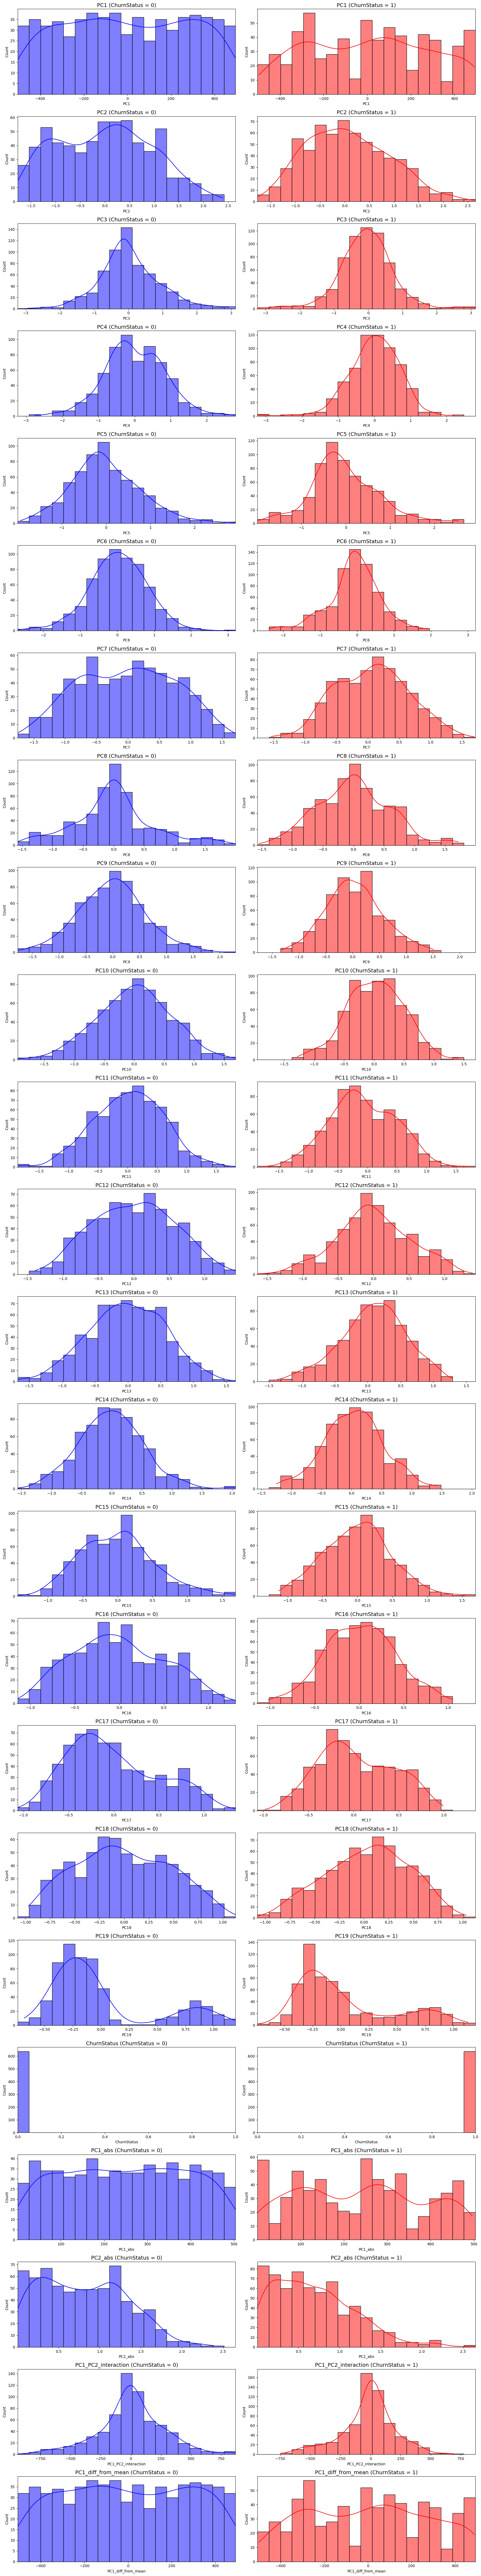

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(len(num_cols), 2, figsize=(18, 4 * len(num_cols)))  # Two columns for side-by-side plots

for i, col in enumerate(num_cols):
    # Calculate common bin edges
    col_min = pca_df_resampled[col].min()
    col_max = pca_df_resampled[col].max()
    bin_edges = np.linspace(col_min, col_max, 20)  # 20 bins as an example, adjust as needed

    # Plot for ChurnStatus == 0
    sns.histplot(
        pca_df_resampled[pca_df_resampled['ChurnStatus'] == 0][col],
        ax=axes[i, 0],
        color='b',
        kde=True,
        bins=bin_edges
    )
    axes[i, 0].set_title(f'{col} (ChurnStatus = 0)', fontsize=14)
    axes[i, 0].set_xlim([col_min, col_max])
    
    # Plot for ChurnStatus == 1
    sns.histplot(
        pca_df_resampled[pca_df_resampled['ChurnStatus'] == 1][col],
        ax=axes[i, 1],
        color='r',
        kde=True,
        bins=bin_edges
    )
    axes[i, 1].set_title(f'{col} (ChurnStatus = 1)', fontsize=14)
    axes[i, 1].set_xlim([col_min, col_max])

plt.tight_layout()
plt.show()


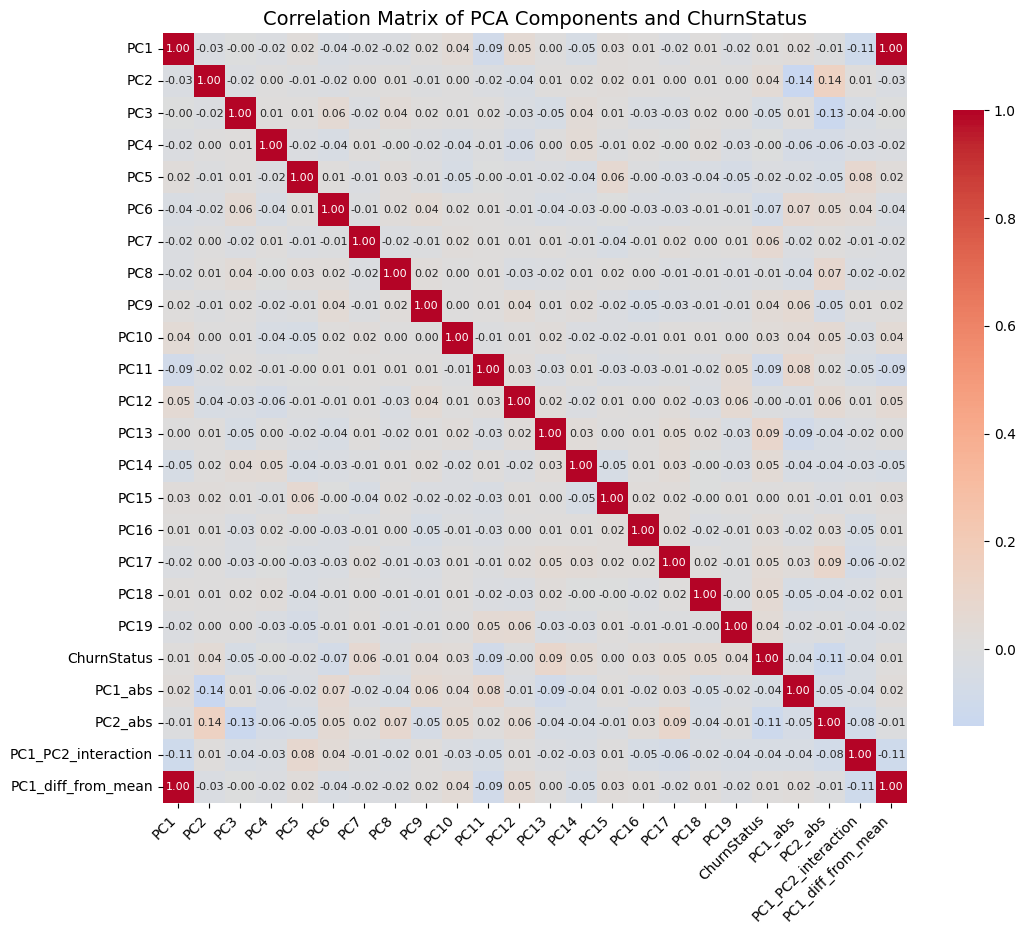

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = pca_df_resampled.corr()

plt.figure(figsize=(12, 10))  
sns.heatmap(
    correlation_matrix, 
    annot=True,          
    fmt=".2f",           
    cmap='coolwarm',    
    center=0, 
    cbar_kws={'shrink': 0.8},  
    annot_kws={"size": 8}      
)
plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.yticks(fontsize=10)    
plt.title('Correlation Matrix of PCA Components and ChurnStatus', fontsize=14)
plt.show()